# <font color = blue>1. Dataset 1 (FIFA: `fifa.csv`)</font>

Di sebuah _alternate universe_, setelah Tsubasa Ozora tidak berhasil membobol gawang Genzo Wakabayashi, Tsubasa memutuskan untuk menggantung sepatu miliknya dan fokus pada kejuaraan dunia FIFA 19. Agar terbentuk sebuah _ultimate team_, Tsubasa ingin menambahkan beberapa pemain baru pada tim miliknya.<br>
a. Jika terdapat __1000__ pemain bola baru yang ditambahkan oleh Tsubasa, tentukan __ekspektasi__ umur pemain bola yang:<br>
i. Berumur __kurang dari 22 tahun__<br>
ii. Berumur __lebih dari 40 tahun__

In [3]:
# FIFA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import binomial

# Read file
data = pd.read_csv('fifa.csv')
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

In [5]:
# Minimum value
data.min()

Name              A. Abang
Age                     16
Nationality    Afghanistan
dtype: object

In [6]:
# Maximum value
data.max()

Name           Óscar Whalley
Age                       45
Nationality         Zimbabwe
dtype: object

In [7]:
# Mean
data.mean()

Age    25.122206
dtype: float64

In [8]:
# Mode
data.mode()

Name  Age Nationality
0  J. Rodríguez   21     England

In [9]:
# Median
data.median()

Age    25.0
dtype: float64

In [10]:
# Variance
data.var()

Age    21.808365
dtype: float64

In [11]:
# Standard deviation
data.std()

Age    4.669943
dtype: float64

In [12]:
# Skewness
data.skew()

Age    0.391764
dtype: float64

In [4]:
# Kurtosis
data.kurtosis()

Age   -0.459514
dtype: float64

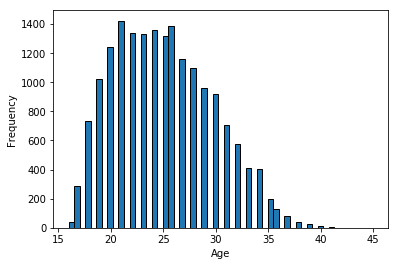

In [2]:
# Histogram
plt.hist(data['Age'], bins = 'auto', edgecolor = 'black')
plt.xlabel('Age')          # Abscissa label
plt.ylabel('Frequency')    # Ordinate label
plt.show()

In [3]:
data.groupby('Age').count()

Name  Nationality
Age                   
16     42           42
17    289          289
18    732          732
19   1024         1024
20   1240         1240
21   1423         1423
22   1340         1340
23   1332         1332
24   1358         1358
25   1319         1319
26   1387         1387
27   1162         1162
28   1101         1101
29    959          959
30    917          917
31    707          707
32    574          574
33    408          408
34    404          404
35    196          196
36    127          127
37     82           82
38     37           37
39     25           25
40     13           13
41      5            5
42      1            1
44      2            2
45      1            1

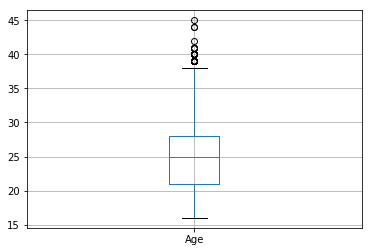

In [2]:
# Boxplot
data.boxplot(column = ['Age'])

## <font color = blue>Fungsi distribusi peluang FIFA</font>

Fungsi distribusi peluang yang paling sesuai adalah <font color = green>distribusi hipergeometrik</font> karena sampel tidak dikembalikan.

##### a. Diketahui:
   $n$ = 1000 pemain bola<br>
   $x$ = Umur pemain bola
#### i. Ditanya:
   $E(X < 22)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>
$h(x, N, n, k) = \frac{\binom{k}{x}\binom{N - k}{n - x}}{\binom{N}{n}}, max\{0, n - (N - k)\} \leq x \leq min\{n, k\}$</font>

In [4]:
n = 1000

def h(x, N, n, k):
# Hypergeometric distribution
    return (binomial(k, x) * binomial(N - k, n - x)) / binomial(N, n)

E = 0
for i in range (1, n + 1):
    E += i * h(i, data['Age'].count(), n, data['Age'][data['Age'] < 22].count())
print('E(X < 22) = ' + str(np.ceil(float(E))) + ' pemain bola')

E(X < 22) = 261.0 pemain bola


#### ii. Ditanya:
   $E(X > 40)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>
$h(x, N, n, k) = \frac{\binom{k}{x}\binom{N - k}{n - x}}{\binom{N}{n}}, max\{0, n - (N - k)\} \leq x \leq min\{n, k\}$</font>

In [5]:
E2 = 0
for i in range (1, n + 1):
    E2 += i * h(i, data['Age'].count(), n, data['Age'][data['Age'] > 40].count())
print('E(X > 40) = ', str(np.ceil(float(E2))), ' pemain bola')

E(X > 40) =  1.0  pemain bola


# <font color = blue>2. Dataset 2 (_Boston Crime_: `crime.csv`)</font>

Detektif Conan Edogawa/Shinichi Kudo sedang menyelidiki data-data dari kejahatan dari Boston. Dia ingin mengetahui apakah ada kejahatan yang akan terjadi pada masa mendatang. Jika ia dapat memprediksi kejahatan selanjutnya, ia dapat mencegah terjadinya kejahatan tersebut. Detektif Conan kemudian melihat data-data kejahatan boston, dan sebelum itu dia harus menjawab pertanyaan berikut:<br>
a. Jika terdapat __1000__ kejahatan baru tentukan ekspektasi kejahatan yang:<br>
i. ___Homicide___<br>
ii. ___Homicide_ tanpa _Shooting___<br>
iii. Terjadi Jam __20:00__ dan Hari __Sabtu__<br>
b. Jika terdapat __2000__ kejahatan baru tentukan __ekspektasi__ kejahatan yang:<br>
i. Terletak di __Geneva Ave atau Prescott Street__<br>
ii. Dilaporkan di __Kantor Polisi Nomor 495 dan District E18__<br>
iii. __Tidak terjadi pada saat hari libur__<br>

In [2]:
# Boston Crime

import pandas as pd
import matplotlib.pyplot as plt
from sympy import binomial
import numpy as np

## Read file
data = pd.read_csv('crime.csv', encoding = "ISO-8859-1")
data

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080041          3006               Medical Assistance   
13          I182080040          3115               Investigate Person   
14          I182080039          3006               Medical Assistance   
15          I182080038          3831  Motor Vehicle Accident Response   
16          I182080037          2647                            Other   
17          I182080035          2647                            Other   
18          I182080034          3115               Investigate Person   
19          I182080031          3108             Fire Related Reports   
20          I182080030          3831  Motor Vehicle Accident Response   
21          I182080029           613                          Larceny   
22          I182080028          3114             Investigate Property   
23          I182080027          3301                  Verbal Disputes   
24          I182080027           619                          Larceny   
25          I182080026          2629                       Harassment   
26          I182080025           311                          Robbery   
27          I182080024          1842                   Drug Violation   
28          I182080023          3115               Investigate Person   
29          I182080022          3006               Medical Assistance   
...                ...           ...                              ...   
327790   I110551302-00          3125                  Warrant Arrests   
327791   I110551302-00           623                          Larceny   
327792   I110372326-00           403               Aggravated Assault   
327793   I110372326-00          3125                  Warrant Arrests   
327794   I110261417-00          3125                  Warrant Arrests   
327795   I110261417-00           619                          Larceny   
327796   I110177502-00          3125                  Warrant Arrests   
327797   I110177502-00           802                   Simple Assault   
327798   I110177502-00          3125                  Warrant Arrests   
327799   I100636670-00           629                          Larceny   
327800   I100636670-00          3125                  Warrant Arrests   
327801   I100340225-00          3125                  Warrant Arrests   
327802   I100340225-00           339                          Robbery   
327803   I100222105-02          3125                  Warrant Arrests   
327804   I100033064-00          2907                       Violations   
327805   I100033064-00          2910                       Violations   
327806   I090321958-00          3125                  Warrant Arrests   
327807   I090321958-00          3125                  Warrant Arrests   
327808   I090317057-00           403               Aggravated Assault   
327809   I090317057-00          3125                  Warrant Arrests   
327810   I080542626-00          3125                  Warrant Arrests   
327811   I080542626-00          1848                   Drug Violation   
327812   I080542626-00          1849                   Drug Viola

In [3]:
## Minimum value
data.min()

INCIDENT_NUMBER                                           142052550
OFFENSE_CODE                                                    111
OFFENSE_CODE_GROUP                               Aggravated Assault
OFFENSE_DESCRIPTION    A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.
REPORTING_AREA                                                     
OCCURRED_ON_DATE                                2015-06-15 00:00:00
YEAR                                                           2015
MONTH                                                             1
DAY_OF_WEEK                                                  Friday
HOUR                                                              0
Lat                                                              -1
Long                                                       -71.1787
Location                                 (-1.00000000, -1.00000000)
dtype: object

In [4]:
## Maximum value
data.max()

INCIDENT_NUMBER                              I182080058
OFFENSE_CODE                                       3831
OFFENSE_CODE_GROUP                      Warrant Arrests
OFFENSE_DESCRIPTION    WEAPON - OTHER - OTHER VIOLATION
REPORTING_AREA                                       99
OCCURRED_ON_DATE                    2018-10-03 20:49:00
YEAR                                               2018
MONTH                                                12
DAY_OF_WEEK                                   Wednesday
HOUR                                                 23
Lat                                              42.395
Long                                                 -1
Location                    (42.39504158, -71.01017732)
dtype: object

In [5]:
## Mean
data.mean(numeric_only = True)

OFFENSE_CODE    2317.961171
YEAR            2016.598676
MONTH              6.672213
HOUR              13.114840
Lat               42.212995
Long             -70.906030
dtype: float64

In [6]:
## Mode
data.mode(numeric_only = True)

OFFENSE_CODE  YEAR  MONTH  HOUR        Lat       Long
0          3006  2017      8    17  42.348624 -71.082776

In [7]:
## Variance
data.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

In [8]:
## Standard deviation
data.std()

OFFENSE_CODE    1184.990073
YEAR               1.009775
MONTH              3.253984
HOUR               6.292714
Lat                2.173496
Long               3.515832
dtype: float64

In [9]:
## Skewness
data.skew()

OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

In [10]:
## Kurtosis
data.kurtosis()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

Text(0, 0.5, 'Frequency')

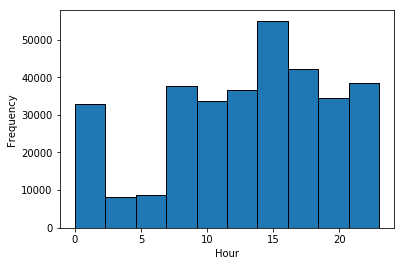

In [13]:
## Histogram
plt.hist(data['HOUR'], edgecolor = 'black')
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

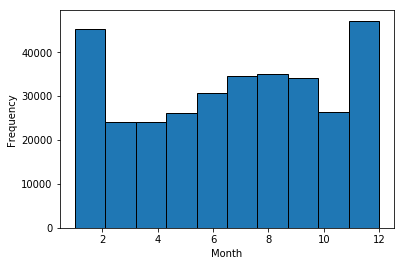

In [14]:
## Histogram
plt.hist(data['MONTH'], edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

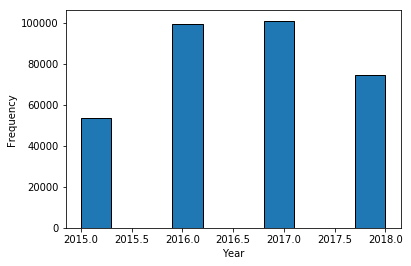

In [17]:
## Histogram
plt.hist(data['YEAR'], edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Frequency')

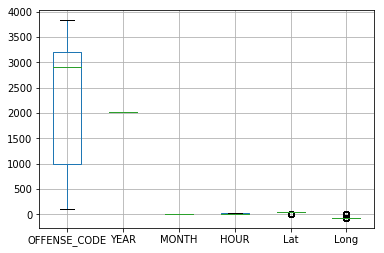

In [16]:
## Boxplot
data.boxplot()

## <font color = blue>Fungsi distribusi peluang _Boston Crime_</font>

Fungsi distribusi peluang yang paling sesuai adalah <font color = green>distribusi Binomial</font> karena dalam data set ini hanya ada dua klasifikasi yaitu sukses dan gagal dengan setiap eksperimen independen.

##### a. Diketahui:
   $n$ = 1000 kejahatan
#### i. Ditanya:
   $E(X = Homicide)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [19]:
data_homicide = data[data.OFFENSE_CODE_GROUP == 'Homicide']
n_homicide = data_homicide.OFFENSE_CODE_GROUP.count()
N = data.INCIDENT_NUMBER.count()
print('E(X = Homicide) = ', np.ceil((n_homicide / N) * 1000), ' kejahatan')

E(X = Homicide) =  1.0  kejahatan


#### ii. Ditanya:
   $E(X = Homicide\ tanpa\ shooting)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [20]:
data_homicide = data[data.OFFENSE_CODE_GROUP == 'Homicide']
data_wshot = data_homicide[data_homicide.SHOOTING.isnull()]
n_homicidewshot = data_wshot.INCIDENT_NUMBER.count()
print('E(X = Homicide tanpa shoooting) = ', np.ceil((n_homicidewshot / N) * 1000), ' kejahatan')

E(X = Homicide tanpa shoooting) =  1.0  kejahatan


#### iii. Ditanya:
   $E(X = Terjadi\ Jam\ 20:00\ dan\ Hari\ Sabtu)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [21]:
data_new = data[(data.HOUR == 20) & (data.DAY_OF_WEEK == 'Saturday')]
n_datanew = data_new.INCIDENT_NUMBER.count()
print('E(X = Terjadi Jam 20:00 dan Hari Sabtu) = ', np.ceil((n_datanew / N) * 1000), ' kejahatan')

E(X = Terjadi Jam 20:00 dan Hari Sabtu) =  7.0  kejahatan


##### a. Diketahui:
   $n$ = 2000 kejahatan
#### i. Ditanya:
   $E(X = Terletak\ di\ Geneva\ Ave\ atau\ Prescott\ Street )$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [23]:
data_new = data[(data.STREET == 'GENEVA AVE') | (data.STREET == 'PRESCOTT ST')]
n_datanew = data_new.INCIDENT_NUMBER.count()
print('E(X = Terletak di Geneva Ave atau Prescott Street ) = ', np.ceil((n_datanew / N) * 2000), ' kejahatan')

E(X = Terletak di Geneva Ave atau Prescott Street ) =  12.0  kejahatan


#### ii. Ditanya:
   $E(X = Dilaporkan\ di\ Kantor\ Polisi\ Nomor\ 495\ dan\ District\ E1)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [24]:
data_new = data[(data.REPORTING_AREA == '495') & (data.DISTRICT == 'E18')]
n_datanew = data_new.INCIDENT_NUMBER.count()
print('E(X = Dilaporkan di Kantor Polisi Nomor 495 dan District E18 ) = ', np.ceil((n_datanew / N) * 2000), ' kejahatan')

E(X = Dilaporkan di Kantor Polisi Nomor 495 dan District E18 ) =  4.0  kejahatan


#### iii. Ditanya:
   $E(X = Tidak\ terjadi\ pada\ saat\ hari\ libur)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>

In [27]:
data_new = data[(data.DAY_OF_WEEK == 'Sunday') | (data.DAY_OF_WEEK == 'Saturday')]
n_datanew = N - data_new.INCIDENT_NUMBER.count()
print('E(X = Tidak terjadi pada saat hari libur ) = ', np.ceil((n_datanew / N) * 2000), ' kejahatan')

E(X = Tidak terjadi pada saat hari libur ) =  1468.0  kejahatan


# <font color = blue>4. Dataset 4 (_Cryptocurrency_: `crypto.csv`)</font>

Nyonya Rin sangat suka batu permata, tetapi uang yang dia punya terlalu sedikit untuk membiayai kebutuhan berliannya. Dia mendengar bahwa bermain dengan _cryptocurrency_ adalah cara yang sangat cepat untuk menjadi sangat kaya (atau sangat miskin). Anda, sebagai seorang yang haus uang, bersekongkol dengan Nyonya Rin untuk bermain _cryptocurrency_, di mana Nyonya Rin menyediakan modal. Anda seorang statistikawan dan belum pernah menyentuh pasar modal atau semacamnya, sehingga Anda mengambil data pergerakan harga _cryptocurrency_, lalu dengan lugunya membuang dimensi waktu dari data tersebut. Nyonya Rin, sama-sama buta dalam permainan pasar modal, menanyakan pertanyaan kurang relevan sebagai berikut:<br>
a. Apabila hari ini terdapat __1000__ data harga _cryptocurrency_ baru, tentukan __ekspektasi__ jumlah _cryptocurrency_ yang nilainya<br>
i. __kurang dari 0.177013__<br>
ii. __lebih dari 177.013__<br>
b. Jika suatu hari terdapat sebuah _cryptocurrency_ baru, tentukan __peluang__ _cryptocurrency_ tersebut bernilai<br>
i. __lebih dari 0.013__<br>
ii. __kurang dari 17.7__<br>

In [31]:
# Cryptocurrency

import pandas as pd
from sympy import binomial
from scipy.stats import gamma

## Read file
data = pd.read_csv('crypto.csv')
data

1.5e-05
0       0.000023
1       0.000033
2       0.000037
3       0.000037
4       0.000037
5       0.000036
6       0.000073
7       0.000072
8       0.000073
9       0.000067
10      0.000069
11      0.000082
12      0.000113
13      0.000111
14      0.000112
15      0.000124
16      0.000124
17      0.000113
18      0.000109
19      0.000098
20      0.000090
21      0.000086
22      0.000085
23      0.000085
24      0.000084
25      0.000082
26      0.000081
27      0.000060
28      0.000037
29      0.000034
...          ...
632187  0.113194
632188  0.087992
632189  0.101825
632190  0.334725
632191  0.690254
632192  0.625767
632193  0.230924
632194  0.114744
632195  0.089624
632196  0.143865
632197  0.112651
632198  0.126489
632199  0.145279
632200  0.132727
632201  0.126085
632202  0.225772
632203  0.129094
632204  0.228046
632205  0.323451
632206  0.073590
632207  0.074413
632208  0.061524
632209  0.130473
632210  0.211989
632211  0.070326
632212  0.045676
632213  0.057948
632214  0.082787
632215  0.091944
632216  0.089511

[632217 rows x 1 columns]

In [32]:
## Minimum value
data.min()

1.5e-05    2.925000e-09
dtype: float64

In [33]:
## Maximum value
data.max()

1.5e-05    2383502.5
dtype: float64

In [34]:
## Mean
data.mean()

1.5e-05    203.018467
dtype: float64

In [35]:
## Mode
data.mode()

1.5e-05
0  0.000002

In [36]:
## Variance
data.var()

1.5e-05    7.532053e+07
dtype: float64

In [37]:
## Standard deviation
data.std()

1.5e-05    8678.740363
dtype: float64

In [38]:
## Skewness
data.skew()

1.5e-05    118.239514
dtype: float64

In [39]:
## Kurtosis
data.kurtosis()

1.5e-05    22297.435591
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d96d30>]],
      dtype=object)

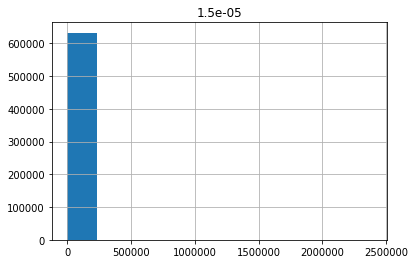

In [40]:
# Histogram
data.hist()

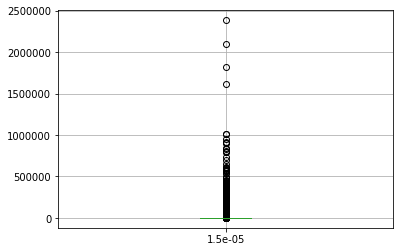

In [41]:
## Boxplot
data.boxplot()

## <font color = blue>Fungsi distribusi peluang _Cryptocurrency_</font>

Fungsi distribusi peluang yang paling sesuai adalah <font color = green>distribusi Gamma</font> karena data condong di satu sisi saja.

#### a. Diketahui:
$n$ = 1000<br>
$x$ = Jumlah _cryptocurrency_
#### i. Ditanya:
$E(x < 0.177013)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$<br>
$p(x, \lambda t) = \frac{e^{-\lambda t}\lambda t^{x}}{x!}$</font>

In [42]:
b = data.var() / data.mean()
a = data.mean() / b
E = gamma.cdf(0.177013, a = a, scale = b)[0] * 1000
print('E(X < 0.177013) = ', E)

E(X < 0.177013) =  992.3798146838676


#### i. Ditanya:
$E(x > 177.013)$
#### Jawaban:
<font color = green>$E(x) = \sum_{x} x f(x)$</font>

In [43]:
E2 = (1 - gamma.cdf(177.013, a = a, scale = b)[0]) * 1000
print('E(X > 177.013) = ', E2)

E(X > 177.013) =  3.8621259486640858


In [44]:
P = 1 - gamma.cdf(0.013, a = a, scale = b)[0]
print('P(X > 0.013) = ', P)

P(X > 0.013) =  0.009037210952540176


In [45]:
P2 = gamma.cdf(17.7, a = a, scale = b)[0]
print('P(X < 17.7) = ', P2)

P(X < 17.7) =  0.9948837161741786


# <font color = blue>5. Dataset 5 (Atlet Olimpiade: `athletes.csv`)</font>

Tuan X adalah seorang mantan atlet tua dan miskin yang melewati kesempatannya meraih kejayaan dalam Olimpiade. Dia memiliki seorang anak, Y, yang dia hendak didik dari bayi untuk menjadi atlet Olimpiade kelas dunia, apapun caranya. Dia telah meminta Anda, seorang statistikawan, untuk menganalisis peluang bocah ingusan tersebut mendapat setidaknya satu medali apapun (emas, perak, perunggu, yang penting dijual dapat uang banyak). Anda memiliki data nama-nama semua atlet yang pernah mengikuti Olimpiade, dari tahun 1800-an hingga 2018, serta jumlah medali apapun yang pernah ia raih seumur hidupnya. Demi kesohoran anak malang tersebut, Anda harus menentukan jawaban persoalan berikut:<br>
a. __Peluang__ Y meraih<br>
i. tepat __0 medali__<br>
ii. __lebih dari 10 medali__<br>
iii. tepat __3 medali__<br>
iv. __1 atau 5 medali__<br>
b. ___Confidence interval_ 95%__

In [1]:
# Atlet Olimpiade

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Read file
data = pd.read_csv('athletes.csv')
data

Name  Medal
0                                             A Dijiang      0
1                                              A Lamusi      0
2                              A. Aanantha Sambu Mayavo      0
3                                       A. Abdul Razzak      0
4                                               A. Brun      0
5                                            A. Buydens      0
6                                        A. Charles Six      0
7                                          A. Christory      0
8                                             A. Darnis      0
9                                         A. Duponcheel      0
10                                           A. E. Page      0
11                                        A. G. Chagale      0
12                       A. Germaine Golding (Regnier-)      0
13                                           A. Godinat      0
14                                    A. Hurtado Vargas      0
15                                     A. Hussain Ahmed      0
16                                       A. J. J. Fridt      0
17              A. J. Tyronne Benildus "Benny" Fernando      0
18                                          A. Kordonis      0
19                                            A. Laffen      0
20                                        A. Lafontaine      0
21                                    A. Lambrecht, Jr.      0
22                                         A. O. Pinner      0
23                                         A. Papadakis      0
24                                           A. Porcher      0
25                                           A. Priftis      0
26                                             A. Roger      0
27                                         A. S. Harley      0
28                                    A. Sattar Basheer      0
29                                           A. Schmitt      0
...                                                 ...    ...
134701                            Isabelle Regina Werth     10
134702                                     Marit Bjrgen     10
134703                      Polina Hryhorivna Astakhova     10
134704                         Raisa Petrovna Smetanina     10
134705                      Raymond Clarence "Ray" Ewry     10
134706                                Stefania Belmondo     10
134707                    Vitaly Venediktovich Shcherbo     10
134708                                        Yang Yang     10
134709                        gnes Keleti-Srkny (Klein)     10
134710                    Aleksandr Vladimirovich Popov     11
134711                             Carl Townsend Osburn     11
134712                                Mark Andrew Spitz     11
134713                   Matthew Nicholas "Matt" Biondi     11
134714                        Viktor Ivanovych Chukarin     11
134715                           Vra slavsk (-Odloilov)     11
134716                          Aleksey Yuryevich Nemov     12
134717                           Birgit Fischer-Schmidt     12
134718             Dara Grace Torres (-Hoffman, -Minas)     12
134719  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
134720                    Natalie Anne Coughlin (-Hall)     12
134721                             Paavo Johannes Nurmi     12
134722                               Ryan Steven Lochte     12
134723                                       Sawao Kato     12
134724                      Borys Anfiyanovych Shakhlin     13
134725                              Edoardo Mangiarotti     13
134726                              Ole Einar Bjrndalen     13
134727                                      Takashi Ono     13
134728                     Nikolay Yefimovich Andrianov     15
134729               Larysa Semenivna Latynina (Diriy-)     18
134730                          Michael Fred Phelps, II     28

[134731 rows x 2 columns]

In [2]:
## Minimum value
data.min()

Name     A Dijiang
Medal            0
dtype: object

In [3]:
## Maximum value
data.max()

Name     zzet nce
Medal          28
dtype: object

In [2]:
## Mean
data['Medal'].mean()

0.2952772561622789

In [4]:
## Mode
data.mode()

Name  Medal
0                                     A Dijiang    0.0
1                                      A Lamusi    NaN
2                      A. Aanantha Sambu Mayavo    NaN
3                               A. Abdul Razzak    NaN
4                                     A. Albert    NaN
5                                       A. Brun    NaN
6                                    A. Buydens    NaN
7                                A. Charles Six    NaN
8                                  A. Christory    NaN
9                                     A. Darnis    NaN
10                                    A. Dubois    NaN
11                                A. Duponcheel    NaN
12                                   A. E. Page    NaN
13                                A. G. Chagale    NaN
14               A. Germaine Golding (Regnier-)    NaN
15                                   A. Godinat    NaN
16                            A. Hurtado Vargas    NaN
17                             A. Hussain Ahmed    NaN
18                               A. J. J. Fridt    NaN
19      A. J. Tyronne Benildus "Benny" Fernando    NaN
20                        A. Joshua "Josh" West    NaN
21                                  A. Kordonis    NaN
22                                    A. Laffen    NaN
23                                A. Lafontaine    NaN
24                            A. Lambrecht, Jr.    NaN
25                                     A. Lawry    NaN
26                                  A. M. Woods    NaN
27                                 A. O. Pinner    NaN
28                                 A. Papadakis    NaN
29                                   A. Porcher    NaN
...                                         ...    ...
134701                          van der Stoppen    NaN
134702              variste Marius Fernand Prat    NaN
134703                             ve Lamoureux    NaN
134704                           velyne Cloupet    NaN
134705                            velyne Imbert    NaN
134706                  velyne Lebret (-Renard)    NaN
134707                              velyne lien    NaN
134708             ver Maximiliano David Banega    NaN
134709                 verson da Silva Teixeira    NaN
134710                  verton dos Santos Lopes    NaN
134711                             ystein Brten    NaN
134712           ystein Carlsen (-Lund Carlsen)    NaN
134713                             ystein Grdum    NaN
134714                           ystein Jarlsbo    NaN
134715                          ystein Mellerud    NaN
134716                             ystein Olsen    NaN
134717                         ystein Pettersen    NaN
134718                        ystein Slettemark    NaN
134719                               yvind Berg    NaN
134720                             yvind Tveter    NaN
134721                                zcan Ediz    NaN
134722                             zdemir Akbal    NaN
134723                             zden Ezinler    NaN
134724                                 zer Atei    NaN
134725                               zge Bayrak    NaN
134726                        zge Krdar emberci    NaN
134727                                zlem Kaya    NaN
134728                               zman Graud    NaN
134729                               zzet Safer    NaN
134730                                 zzet nce    NaN

[134731 rows x 2 columns]

In [5]:
## Variance
data.var()

Medal    0.525213
dtype: float64

In [6]:
## Standard deviation
data.std()

Medal    0.724716
dtype: float64

In [7]:
## Skewness
data.skew()

Medal    4.819999
dtype: float64

In [8]:
## Kurtosis
data.kurtosis()

Medal    51.562526
dtype: float64

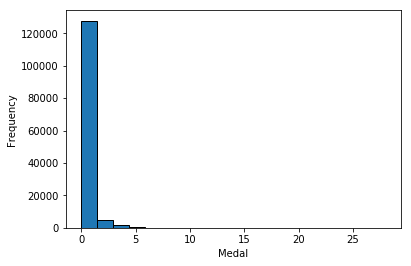

In [9]:
## Histogram
plt.hist(data['Medal'], bins = 'auto', edgecolor = 'black')
plt.xlabel('Medal')        # Abscissa label
plt.ylabel('Frequency')    # Ordinate label
plt.show()

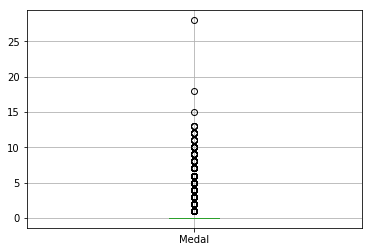

In [10]:
## Boxplot
data.boxplot()

## <font color = blue>Fungsi distribusi peluang Atlet Olimpiade</font>

Fungsi distribusi peluang yang paling sesuai adalah <font color = green>distribusi Binomial</font> karena dalam data set ini hanya ada dua klasifikasi yaitu sukses dan gagal.

#### a. Diketahui:
$m$ = Medali
#### i. Ditanya:
$P(M = 0)$
#### Jawaban:
$P(M = 0) = \frac{n(M = 0)}{n(S)}$

In [11]:
P = data['Medal'][data['Medal'] == 0].count() / data['Medal'].count()
print('P(M = 0) = ' + str(P))

P(M = 0) = 0.7906792052311643


#### ii. Ditanya:
$P(M > 10)$
#### Jawab:
$P(M > 10) = \frac{n(M > 10)}{n(S)}$

In [12]:
P2 = data['Medal'][data['Medal'] > 10].count() / data['Medal'].count()
print('P(M > 10) = ' + str(P2))

P(M > 10) = 0.00015586613325812174


#### iii. Ditanya:
$P(M = 3)$
#### Jawaban:
$P(M = 3) = \frac{n(M = 3)}{n(S)}$

In [13]:
P3 = data['Medal'][data['Medal'] == 3].count() / data['Medal'].count()
print('P(M = 3) = ' + str(P3))

P(M = 3) = 0.01027974259821422


#### iv. Ditanya:
$P(M = 1 ∪ M = 5)$
#### Jawaban:
$P(M = 1 ∪ M = 5) = \frac{n(M = 1) + n(M = 5)}{n(S)}$

In [14]:
P4 = (data['Medal'][data['Medal'] == 1].count() + data['Medal'][data['Medal'] == 5].count()) / data['Medal'].count()
print('P(M = 1 ∪ M = 5) = ' + str(P4))

P(M = 1 ∪ M = 5) = 0.1588424341836697


#### b. Diketahui:
$1 - \alpha = 0.95$
#### Ditanya:
_Confidence interval_
#### Jawaban:
<font color = green>$\bar{x} - t_{\alpha / 2}\frac{s}{\sqrt{n}} \le \mu \le \bar{x} + t_{\alpha / 2}\frac{s}{\sqrt{n}}$</font>

In [15]:
c = 0.95
ci = st.t.interval(c, data['Medal'].count() - 1, data['Medal'].mean(), st.sem(data['Medal']))
print(str(ci[0]) + ' < 𝜇 < ' + str(ci[1]))

0.29140747795632177 < 𝜇 < 0.29914703436823603
